In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
data = pd.read_csv(r'D:\Teks 2024\HR-Employee-Attrition.csv')

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


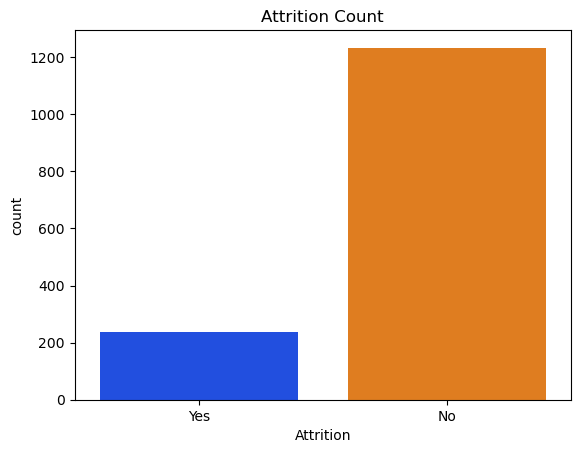

In [11]:
sns.countplot(data=data, x='Attrition', palette='bright')
plt.title('Attrition Count')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


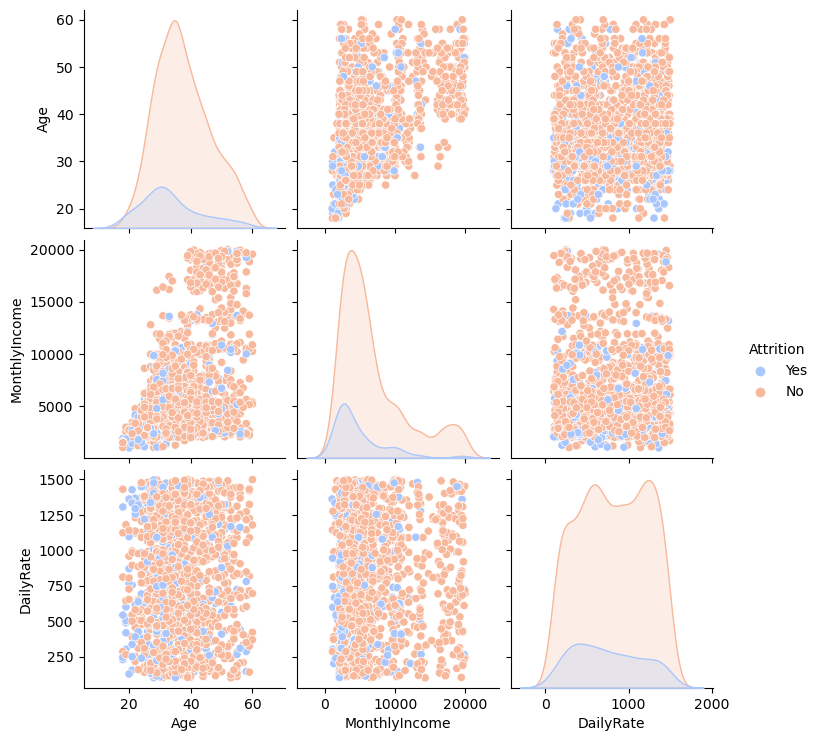

In [12]:
sns.pairplot(data, vars = ['Age','MonthlyIncome','DailyRate'], hue = 'Attrition', palette = 'coolwarm')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


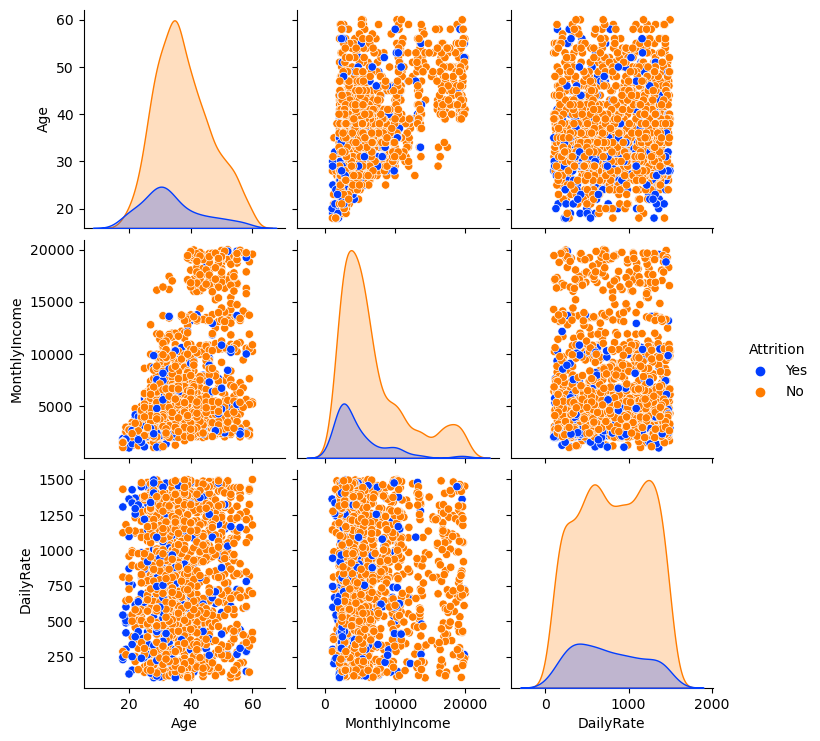

In [13]:
sns.pairplot(data, vars = ['Age','MonthlyIncome','DailyRate'], hue = 'Attrition', palette = 'bright')
plt.show()

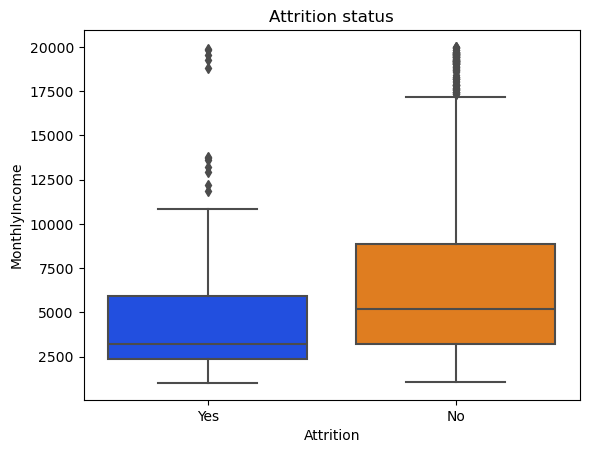

In [14]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, palette = 'bright')
plt.title('Attrition status')
plt.show()

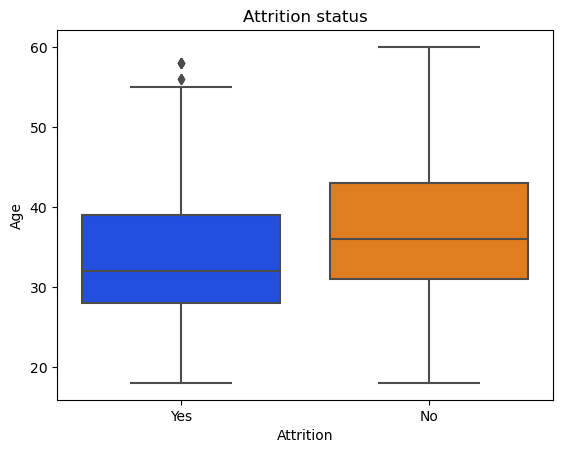

In [15]:
sns.boxplot(x='Attrition', y='Age', data=data, palette = 'bright')
plt.title('Attrition status')
plt.show()

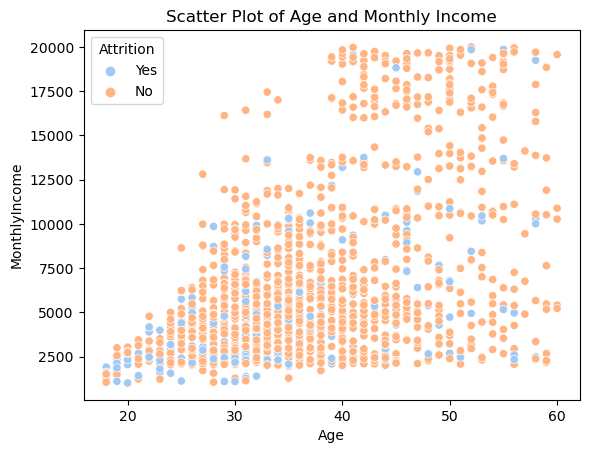

In [16]:
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data, palette="pastel")
plt.title('Scatter Plot of Age and Monthly Income')
plt.show()

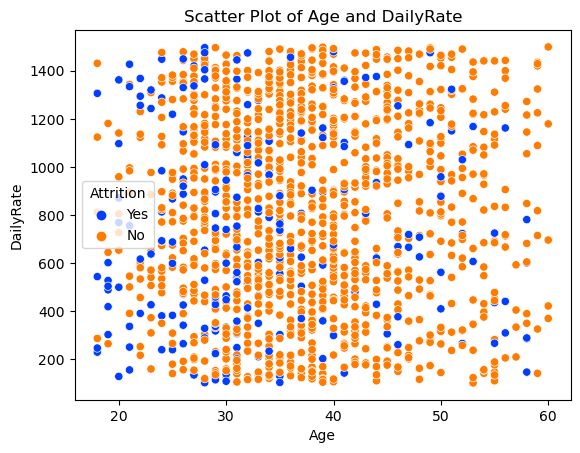

In [17]:
sns.scatterplot(x='Age', y='DailyRate', hue='Attrition', data=data, palette="bright")
plt.title('Scatter Plot of Age and DailyRate')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


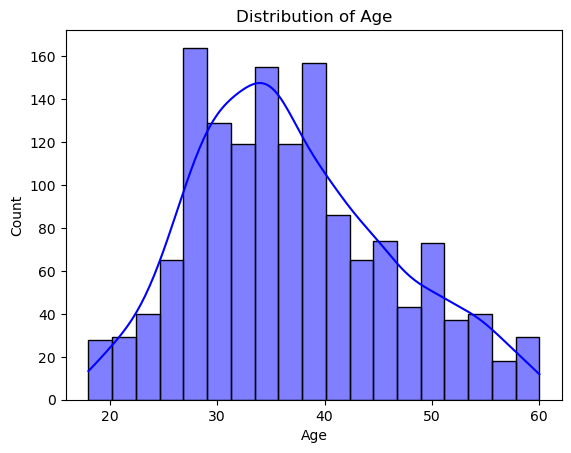

In [18]:
sns.histplot(data['Age'], kde=True, color="blue")
plt.title('Distribution of Age')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


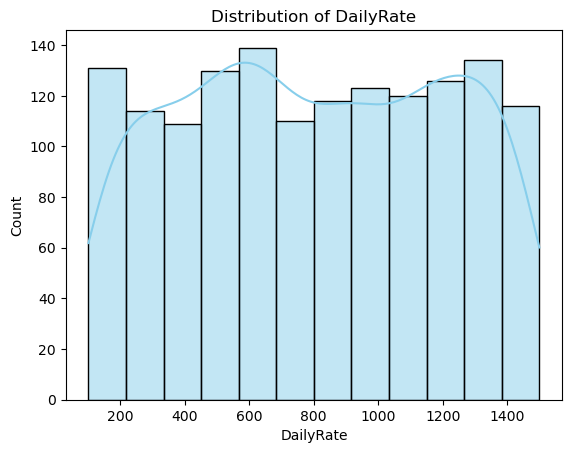

In [19]:
sns.histplot(data['DailyRate'], kde=True, color="skyblue")
plt.title('Distribution of DailyRate')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


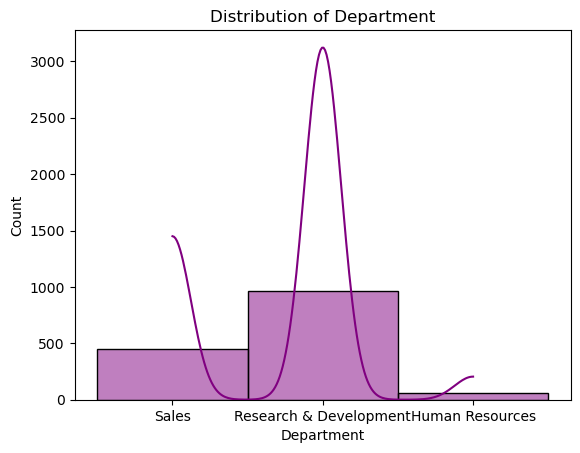

In [20]:
sns.histplot(data['Department'], kde=True, color="purple")
plt.title('Distribution of Department')
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


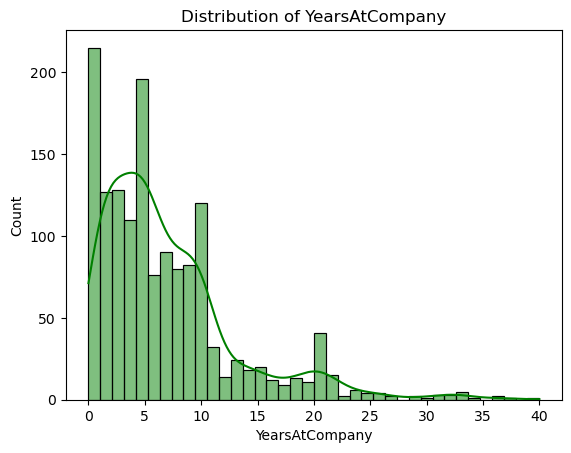

In [21]:
sns.histplot(data['YearsAtCompany'], kde=True, color="green")
plt.title('Distribution of YearsAtCompany')
plt.show()

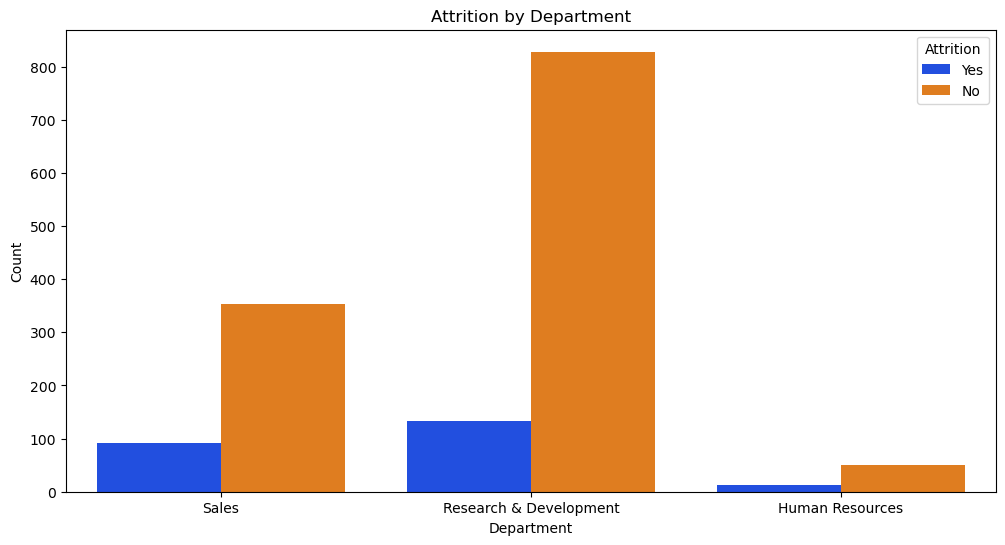

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Attrition', data=data, palette='bright')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

C:\Users\sekpu\AppData\Local\Temp\ipykernel_8996\3986740207.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='JobRole', y='MonthlyIncome', data=data, palette='viridis', ci=None)


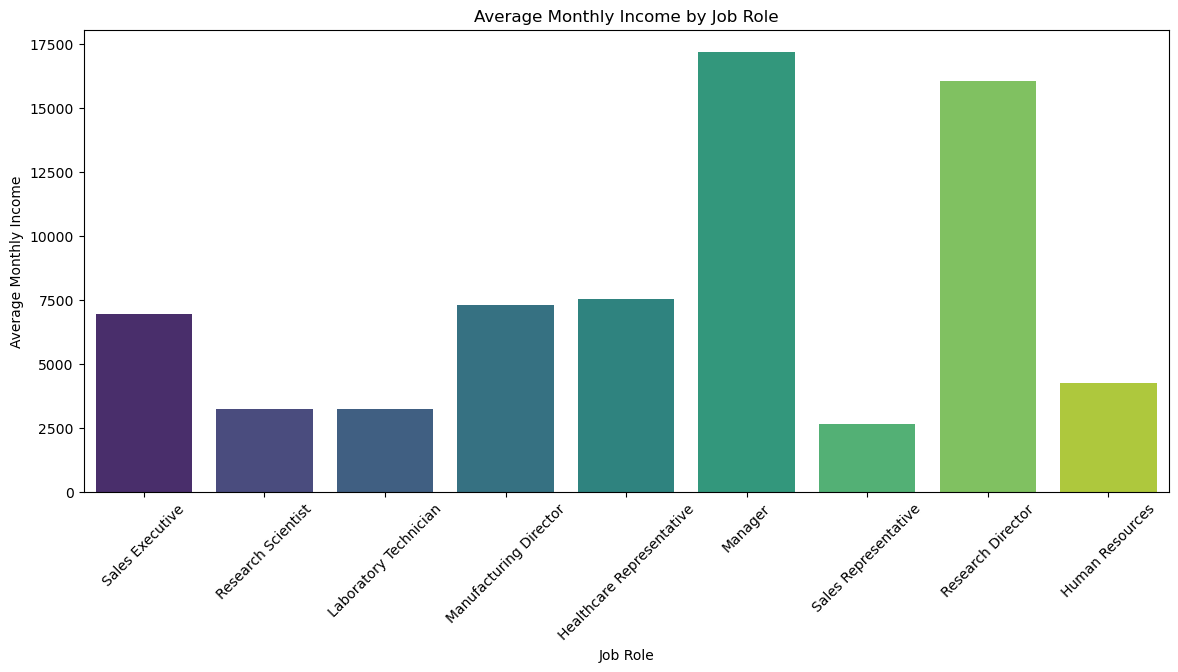

In [23]:
plt.figure(figsize=(14, 6))
sns.barplot(x='JobRole', y='MonthlyIncome', data=data, palette='viridis', ci=None)
plt.title('Average Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=45)
plt.show()

C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sekpu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


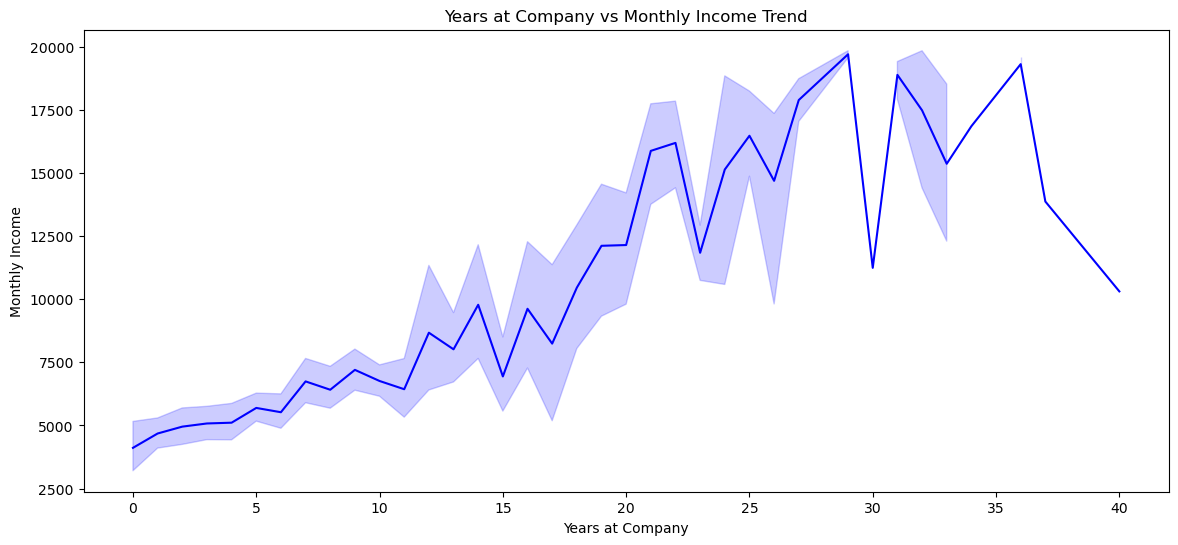

In [24]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=data, color='b')
plt.title('Years at Company vs Monthly Income Trend')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
plt.show()

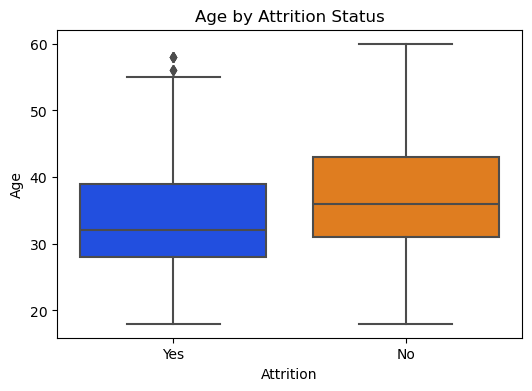

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Attrition', y='Age', palette='bright')
plt.title('Age by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

Looking at the age distribution of employees who left compared to those who stayed could reveal interesting trends, like whether younger or older employees are more likely to leave. This could provide a better understanding of how age might play a role in employee retention.

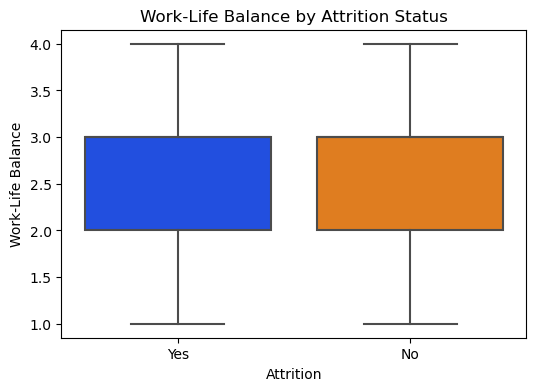

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Attrition', y='WorkLifeBalance', palette='bright')
plt.title('Work-Life Balance by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Work-Life Balance')
plt.show()

Employees who report lower work-life balance ratings might be more likely to leave, as the stress and strain of poor work-life balance can lead to job dissatisfaction. This is not the only factor of attrition in this dataset. There are other factors as well.

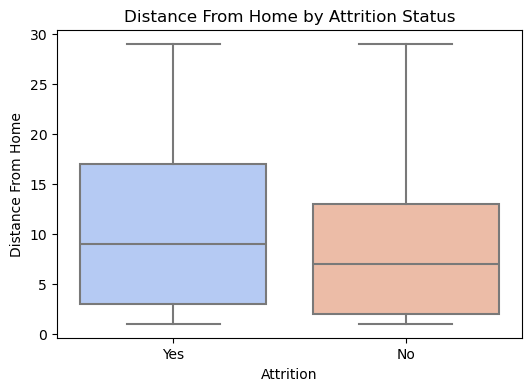

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', palette='coolwarm')
plt.title('Distance From Home by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()

When the commuting distance is higher, employees tend to take leaves often and also causes dissatisfaction and tiredness which lead to attrition

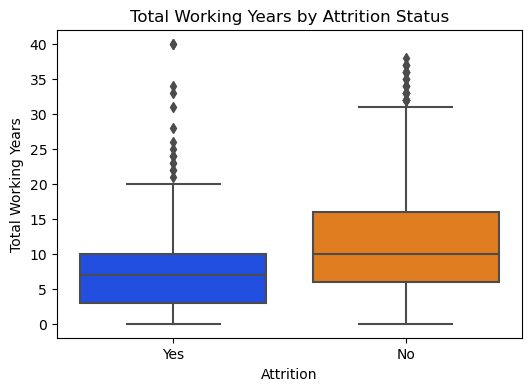

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Attrition', y='TotalWorkingYears', palette='bright')
plt.title('Total Working Years by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

This boxplot explains that less experienced employees tend to leave the company thinking there is no scope of commitment towards the company and leads to higher attrition levels.

In [29]:
print("Counts for 'Attrition':")
print(data['Attrition'].value_counts())

Counts for 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [30]:
print("\nCounts for 'BusinessTravel':")
print(data['BusinessTravel'].value_counts())


Counts for 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


In [31]:
print("\nCounts for 'EducationField':")
print(data['EducationField'].value_counts())


Counts for 'EducationField':
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


In [32]:
print("\nCounts for 'Gender':")
print(data['Gender'].value_counts())


Counts for 'Gender':
Gender
Male      882
Female    588
Name: count, dtype: int64


In [33]:
print("\nCounts for 'JobRole':")
print(data['JobRole'].value_counts())


Counts for 'JobRole':
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


In [34]:
print("\nCounts for 'MaritalStatus':")
print(data['MaritalStatus'].value_counts())


Counts for 'MaritalStatus':
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


In [35]:
print("\nCounts for 'OverTime':")
print(data['OverTime'].value_counts())


Counts for 'OverTime':
OverTime
No     1054
Yes     416
Name: count, dtype: int64


Final Conclusion :
        Key factors contributing to employee attrition in this dataset include :- low work-life balance, high overtime,limited career growth opportunities. 
        Employees with less experience also show higher turnover rates. 
        Focus on these areas could help improve retention.

In [36]:
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          No       0.83      1.00      0.91       243
         Yes       1.00      0.02      0.04        51

    accuracy                           0.83       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.86      0.83      0.76       294



C:\Users\sekpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print("Decision Tree Classifier Classification Report:\n", classification_report(y_test, y_pred))

Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.88      0.89       243
         Yes       0.48      0.51      0.50        51

    accuracy                           0.82       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.82      0.82      0.82       294

